In [39]:
import pandas as pd

filename = "Volve production data.xlsx"

df = pd.read_excel(filename)


[ -0.64981097 624.24242068]
[ 1.63754934e-03 -1.83583673e+00  7.56349779e+02]
[-1.15719036e-05  1.43428039e-02 -5.53320898e+00  9.85724117e+02]
[ 6.07069083e-08 -1.00741540e-04  5.63825266e-02 -1.24250241e+01
  1.26430221e+03]
[-1.25790396e-10  2.93261346e-07 -2.53987723e-04  9.93025320e-02
 -1.71314577e+01  1.40320069e+03]
[ 2.59575634e-15 -6.64428044e-12  6.60538411e-09 -3.13398979e-06
  6.65691853e-04 -2.52252424e-02 -9.75340099e+00  1.27000876e+03]
[ 1.33107183e-33 -7.27515970e-30  1.79052953e-26 -2.62174693e-23
  2.54212514e-20 -1.71938662e-17  8.32383258e-15 -2.91282381e-12
  7.34982968e-10 -1.31776081e-07  1.62804419e-05 -1.30768133e-03
  6.03756496e-02 -1.04421128e+00 -2.68273981e+01  1.78884929e+03]
[-6.85613734e-46  3.76745819e-42 -8.79114195e-39  1.08221338e-35
 -6.39730587e-33 -4.68963669e-31  3.45174426e-27 -1.85304967e-24
 -5.94754669e-22  1.44801168e-18 -1.04697470e-15  4.63098515e-13
 -1.41091251e-10  3.06785116e-08 -4.78700546e-06  5.29445715e-04
 -4.03440930e-02  2.01

C:\Users\imomoh\AppData\Local\Temp\ipykernel_28036\3051990177.py:31: RankWarning: Polyfit may be poorly conditioned
  y_fitted = create_fit(deg, df, 'BORE_OIL_VOL')


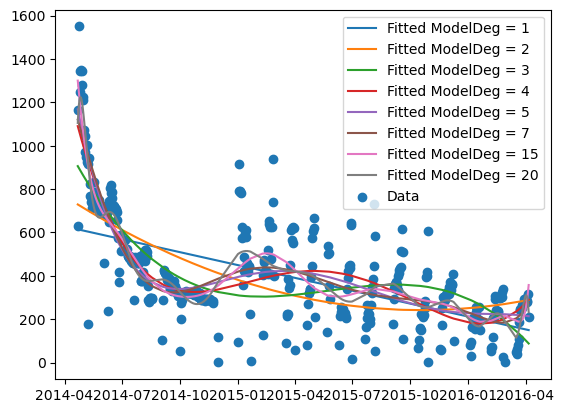

In [40]:
import matplotlib.pyplot as plt
import numpy as np



#data fitting

#create a function to carry out the three steps

def create_fit(degree, df, column_name):
    #1. create x and y values
    x = df.index
    y = df[column_name]
    polyfit = np.polyfit(x,y, deg = degree) # if deg = 1, the fit is  a linear fit
    #error may arise if theere are negative or zero-values in the dataframe. Create a filter to remove these elementa
    print(polyfit)
    #2. Create a function for the data fitting. There is an in-built funtion from numpy
    poly_func = np.poly1d(polyfit) #(expects the value of the constant, c, for a striaght line fit)
    #3. Carry out the predicitons for the fittign usingthe equations
    y_fitted = poly_func(x)

    return y_fitted

df = df[df['WELL_BORE_CODE'] == 'NO 15/9-F-1 C']
df = df[df['BORE_OIL_VOL']>0]

#compare a list of differetn degree fit to see different performance
deg_lst = [1,2,3,4,5,7,15,20]

for deg in deg_lst:
    y_fitted = create_fit(deg, df, 'BORE_OIL_VOL')
    label_fitting = 'Fitted Model' + 'Deg = '+ str(deg)
    plt.plot(df['DATEPRD'], y_fitted, lw = 1.5, label= label_fitting)

plt.scatter(df['DATEPRD'], df['BORE_OIL_VOL'], label = 'Data')
plt.legend()

In [41]:
df.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [42]:
df['WELL_BORE_CODE'].unique()

array(['NO 15/9-F-1 C'], dtype=object)